<a href="https://colab.research.google.com/github/javeriafiaz/Analysis-of-Bank-Debit-Collection-and-Recovery-Strategies/blob/javeria_technocolabs/Submitted_Week_2_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A P2P Lending Market ML Pipeline Using Supervised Machine Learning Algorithms

---

[Project Github Link](https://github.com/Technocolabs100/A-P2P-Lending-Market-ML-Pipeline-Using-Supervised-Machine-Learning-Algorithms)

# Mounting Colab

In [2]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

## Importing Libraries

In [4]:
# Import the required libraries

import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 81)

# Import File

In [7]:
# Import mounted local file
path_to_file =  "/content/drive/MyDrive/Technocolabs Softwares/prosperLoanData.csv"
df_loanData  = pd.read_csv(path_to_file)

In [ ]:
df_loanData.head()

# Size of Data

In [ ]:
# Summary of the Dataframe
print(df_loanData.info())

In [ ]:
# Rows
df_loanData.shape[0]

In [ ]:
# Columns
df_loanData.shape[1]

# Check Duplicated

In [10]:
# Display count of duplicates in all columns
duplicate_count_per_column = {}
for column in df_loanData.columns:
    duplicate_count = df_loanData[column].duplicated().sum()
    duplicate_count_per_column[column] = duplicate_count

duplicate_count_per_column

{'ListingKey': 871,
 'ListingNumber': 871,
 'ListingCreationDate': 873,
 'CreditGrade': 113928,
 'Term': 113934,
 'LoanStatus': 113925,
 'ClosedDate': 111134,
 'BorrowerAPR': 107259,
 'BorrowerRate': 111643,
 'LenderYield': 111654,
 'EstimatedEffectiveYield': 112354,
 'EstimatedLoss': 113816,
 'EstimatedReturn': 112460,
 'ProsperRating (numeric)': 113929,
 'ProsperRating (Alpha)': 113929,
 'ProsperScore': 113925,
 'ListingCategory (numeric)': 113916,
 'BorrowerState': 113885,
 'Occupation': 113869,
 'EmploymentStatus': 113928,
 'EmploymentStatusDuration': 113331,
 'IsBorrowerHomeowner': 113935,
 'CurrentlyInGroup': 113935,
 'GroupKey': 113230,
 'DateCreditPulled': 945,
 'CreditScoreRangeLower': 113910,
 'CreditScoreRangeUpper': 113910,
 'FirstRecordedCreditLine': 102351,
 'CurrentCreditLines': 113882,
 'OpenCreditLines': 113884,
 'TotalCreditLinespast7years': 113818,
 'OpenRevolvingAccounts': 113889,
 'OpenRevolvingMonthlyPayment': 111103,
 'InquiriesLast6Months': 113886,
 'TotalInquir

In [ ]:
# shows sum of duplicate ListingKey
df_loanData[df_loanData['ListingKey'].duplicated()].shape[0]

# Check Null

Method 1:

In [ ]:
null_count = df_loanData.isnull().sum()
null_count

Method 2:

In [ ]:
null_count = df_loanData.isnull().sum()

# Iterate through the columns and print the null count for each one
for column, count in null_count.items():
    print(f"Column '{column}' : {count} null values.")


# Count of ListingKey > 2

Method 1

In [ ]:
filtered_data = df_loanData[df_loanData.duplicated(subset='ListingKey', keep=False)]
print(filtered_data)

Method 2

In [ ]:
duplicated_values = df_loanData['ListingKey'].value_counts()[df_loanData['ListingKey'].value_counts() >= 2].index
print(duplicated_values)

# Fill missing values NaN

In [ ]:
df_loanData.fillna('NaN', inplace=True)
print(df_loanData)


# Remove Duplicate ListingKey

In [22]:
df_loanData.drop_duplicates(subset = 'ListingKey', inplace = True)

In [24]:
# Confirm. You will get False
df_loanData.ListingKey.duplicated().any()

False

# Outliers

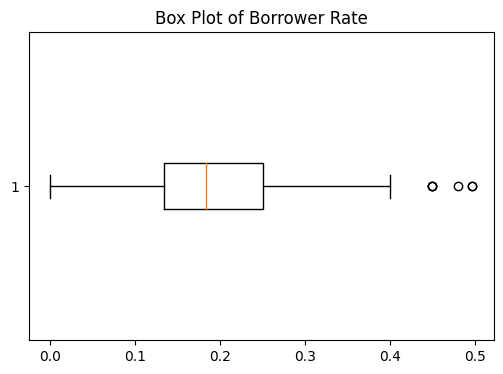

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_loanData['BorrowerRate'], vert=False)
plt.title('Box Plot of Borrower Rate')
plt.show()

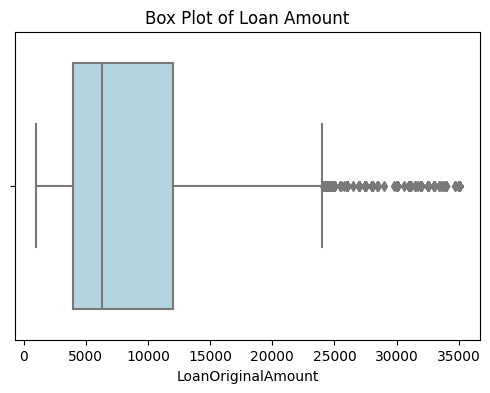

In [ ]:
# Create a box plot using Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(x='LoanOriginalAmount', data=df_loanData, orient='h', color='lightblue')
plt.title('Box Plot of Loan Amount')
plt.show()


# Mapping and Rename

ListingCategory

In [25]:
df_loanData = df_loanData.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

In [ ]:
category_mapping = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans',
    }
df_loanData['ListingCategory'] = df_loanData['ListingCategory'].map(category_mapping)
print(df_loanData)

In [ ]:
df_loanData

LoanStatus

In [ ]:
loanstatus_mapping = {
    'Past Due (1-15 days)': 'Past Due',
    'Past Due (16-30 days)': 'Past Due',
    'Past Due (31-60 days)': 'Past Due',
    'Past Due (61-90 days)': 'Past Due',
    'Past Due (91-120 days)': 'Past Due',
    'Past Due (>120 days)': 'Past Due',
            }
df_loanData['LoanStatus'] = df_loanData['LoanStatus'].replace(loanstatus_mapping)
print(df_loanData)


In [ ]:
df_loanData.LoanStatus.unique()

# Data Encoding

In [ ]:
pip install category_encoders

In [34]:
import category_encoders as ce

In [ ]:
df_loanData.LoanStatus.unique()

In [36]:
# Create an instance of BinaryEncoder for the 'LoanStatus' column
encoder = ce.BinaryEncoder(cols=['LoanStatus'])

In [ ]:
encoder

In [ ]:
# Fit and transform the DataFrame to perform binary encoding
df_encoded = encoder.fit_transform(df_loanData)
df_encoded


In [ ]:
encoder

# Data Labeling

In [ ]:
# Score must be 1-10
df_loanData.ProsperScore.unique()

In [ ]:
# 11 occurs 1431 times
df_loanData['ProsperScore'].value_counts()

In [ ]:
# Calculate the median of non-outlier values (excluding 11)
median_score = df_loanData['ProsperScore'][df_loanData['ProsperScore'] != 11].median()
median_score

Replace 11 with median value

In [47]:
# Replace the value "11" with the calculated median
df_loanData['ProsperScore'] = df_loanData['ProsperScore'].replace(11, median_score)

In [ ]:
df_loanData.ProsperScore.unique()

11 is replaced by median value

In [ ]:
df_loanData['ProsperScore'].value_counts()

Round object data type to int

In [66]:
df_loanData['ProsperScore'] = df_loanData['ProsperScore'].apply(lambda x: round(x) if not pd.isna(x) else x)

### Labelling

In [ ]:
bins = [0.0, 3.0, 6.0, 8.0, 10.0]
labels = ['Very High Risk', 'High Risk', 'Moderate Risk', 'Low Risk']

df_loanData['ProsperScore_Label'] = pd.cut(df_loanData['ProsperScore'], bins=bins, labels=labels, include_lowest=True, right=False)

# .cat.add_categories() add the 'Not Available' label to the category set,
# and then we fill NaN values with 'Not Available'.

df_loanData['ProsperScore_Label'] = df_loanData['ProsperScore_Label'].cat.add_categories('Not Available')
df_loanData['ProsperScore_Label'].fillna('Not Available', inplace=True)

print(df_loanData)


In [ ]:
df_loanData.ProsperScore_Label.unique()

In [ ]:
df_loanData